# Introduction to Data Science (UZOP) - Project - Part 2 & 3

## Studying the diabetes dataset

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder


Loading the data

In [2]:
data = pd.read_csv('diabetes.csv', engine='python')

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Filtering out monotonic and constant features

In [3]:
data = pd.read_csv('diabetes.csv', engine = 'python')
data.columns[data.nunique() <= 1]

is_monotonic = pd.DataFrame(
    data.apply(lambda col:
               "Monotonic" if (col.is_monotonic_increasing or col.is_monotonic_decreasing) else
               "Not Monotonic"
    )
)

print(data.columns[data.nunique() <= 1], is_monotonic)

Index([], dtype='object')                                       0
Pregnancies               Not Monotonic
Glucose                   Not Monotonic
BloodPressure             Not Monotonic
SkinThickness             Not Monotonic
Insulin                   Not Monotonic
BMI                       Not Monotonic
DiabetesPedigreeFunction  Not Monotonic
Age                       Not Monotonic
Outcome                   Not Monotonic


We can see that we do not have a single monotonic or constant value, which is convenient in this case. We'll be using all the columns.

Furthermore, we do not have a single empty field. The following is the percentage of missing/empty values in our dataset per column:

In [4]:
data.isnull().sum().sort_values(ascending=False)/len(data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [5]:
data = data.dropna()

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Since we lack missing values, performing imputation here is unnecessary. 

Next, check for categorical features.

In [6]:
# List of categorical features

categoricalFeatures = list(data.select_dtypes(include=['object']).columns)
print(categoricalFeatures)

[]


As you can see, none. The "Outcome" feature here isn't taken into consideration since it's the target feature.

Preprocessing has mostly been done already.

Let's display the mean, median, minimum and maximum values for each feature.

In [7]:
data.describe().loc[['mean','50%','min','max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We'll additionally find the frequency of each of the values for the target feature.

In [8]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Normalizing the dataset since all features are numerical:

In [9]:
data = (data - data.min()) / (data.max() - data.min())

In [10]:
print(data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

Next, we generate and plot the correlation matrix for the data.

In [11]:
M  = data.corr()
print(M)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

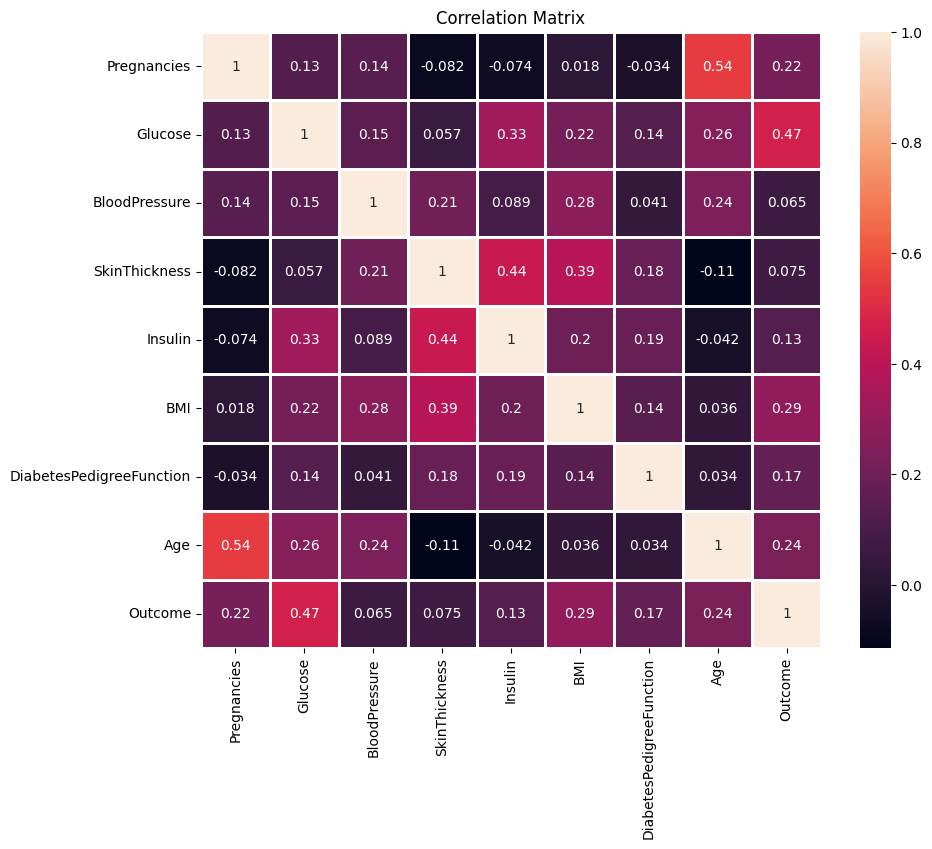

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(M, annot=True, linewidth=.8, cmap="rocket")
plt.title("Correlation Matrix")
plt.show() 

Generating a scatterplot matrix of features:

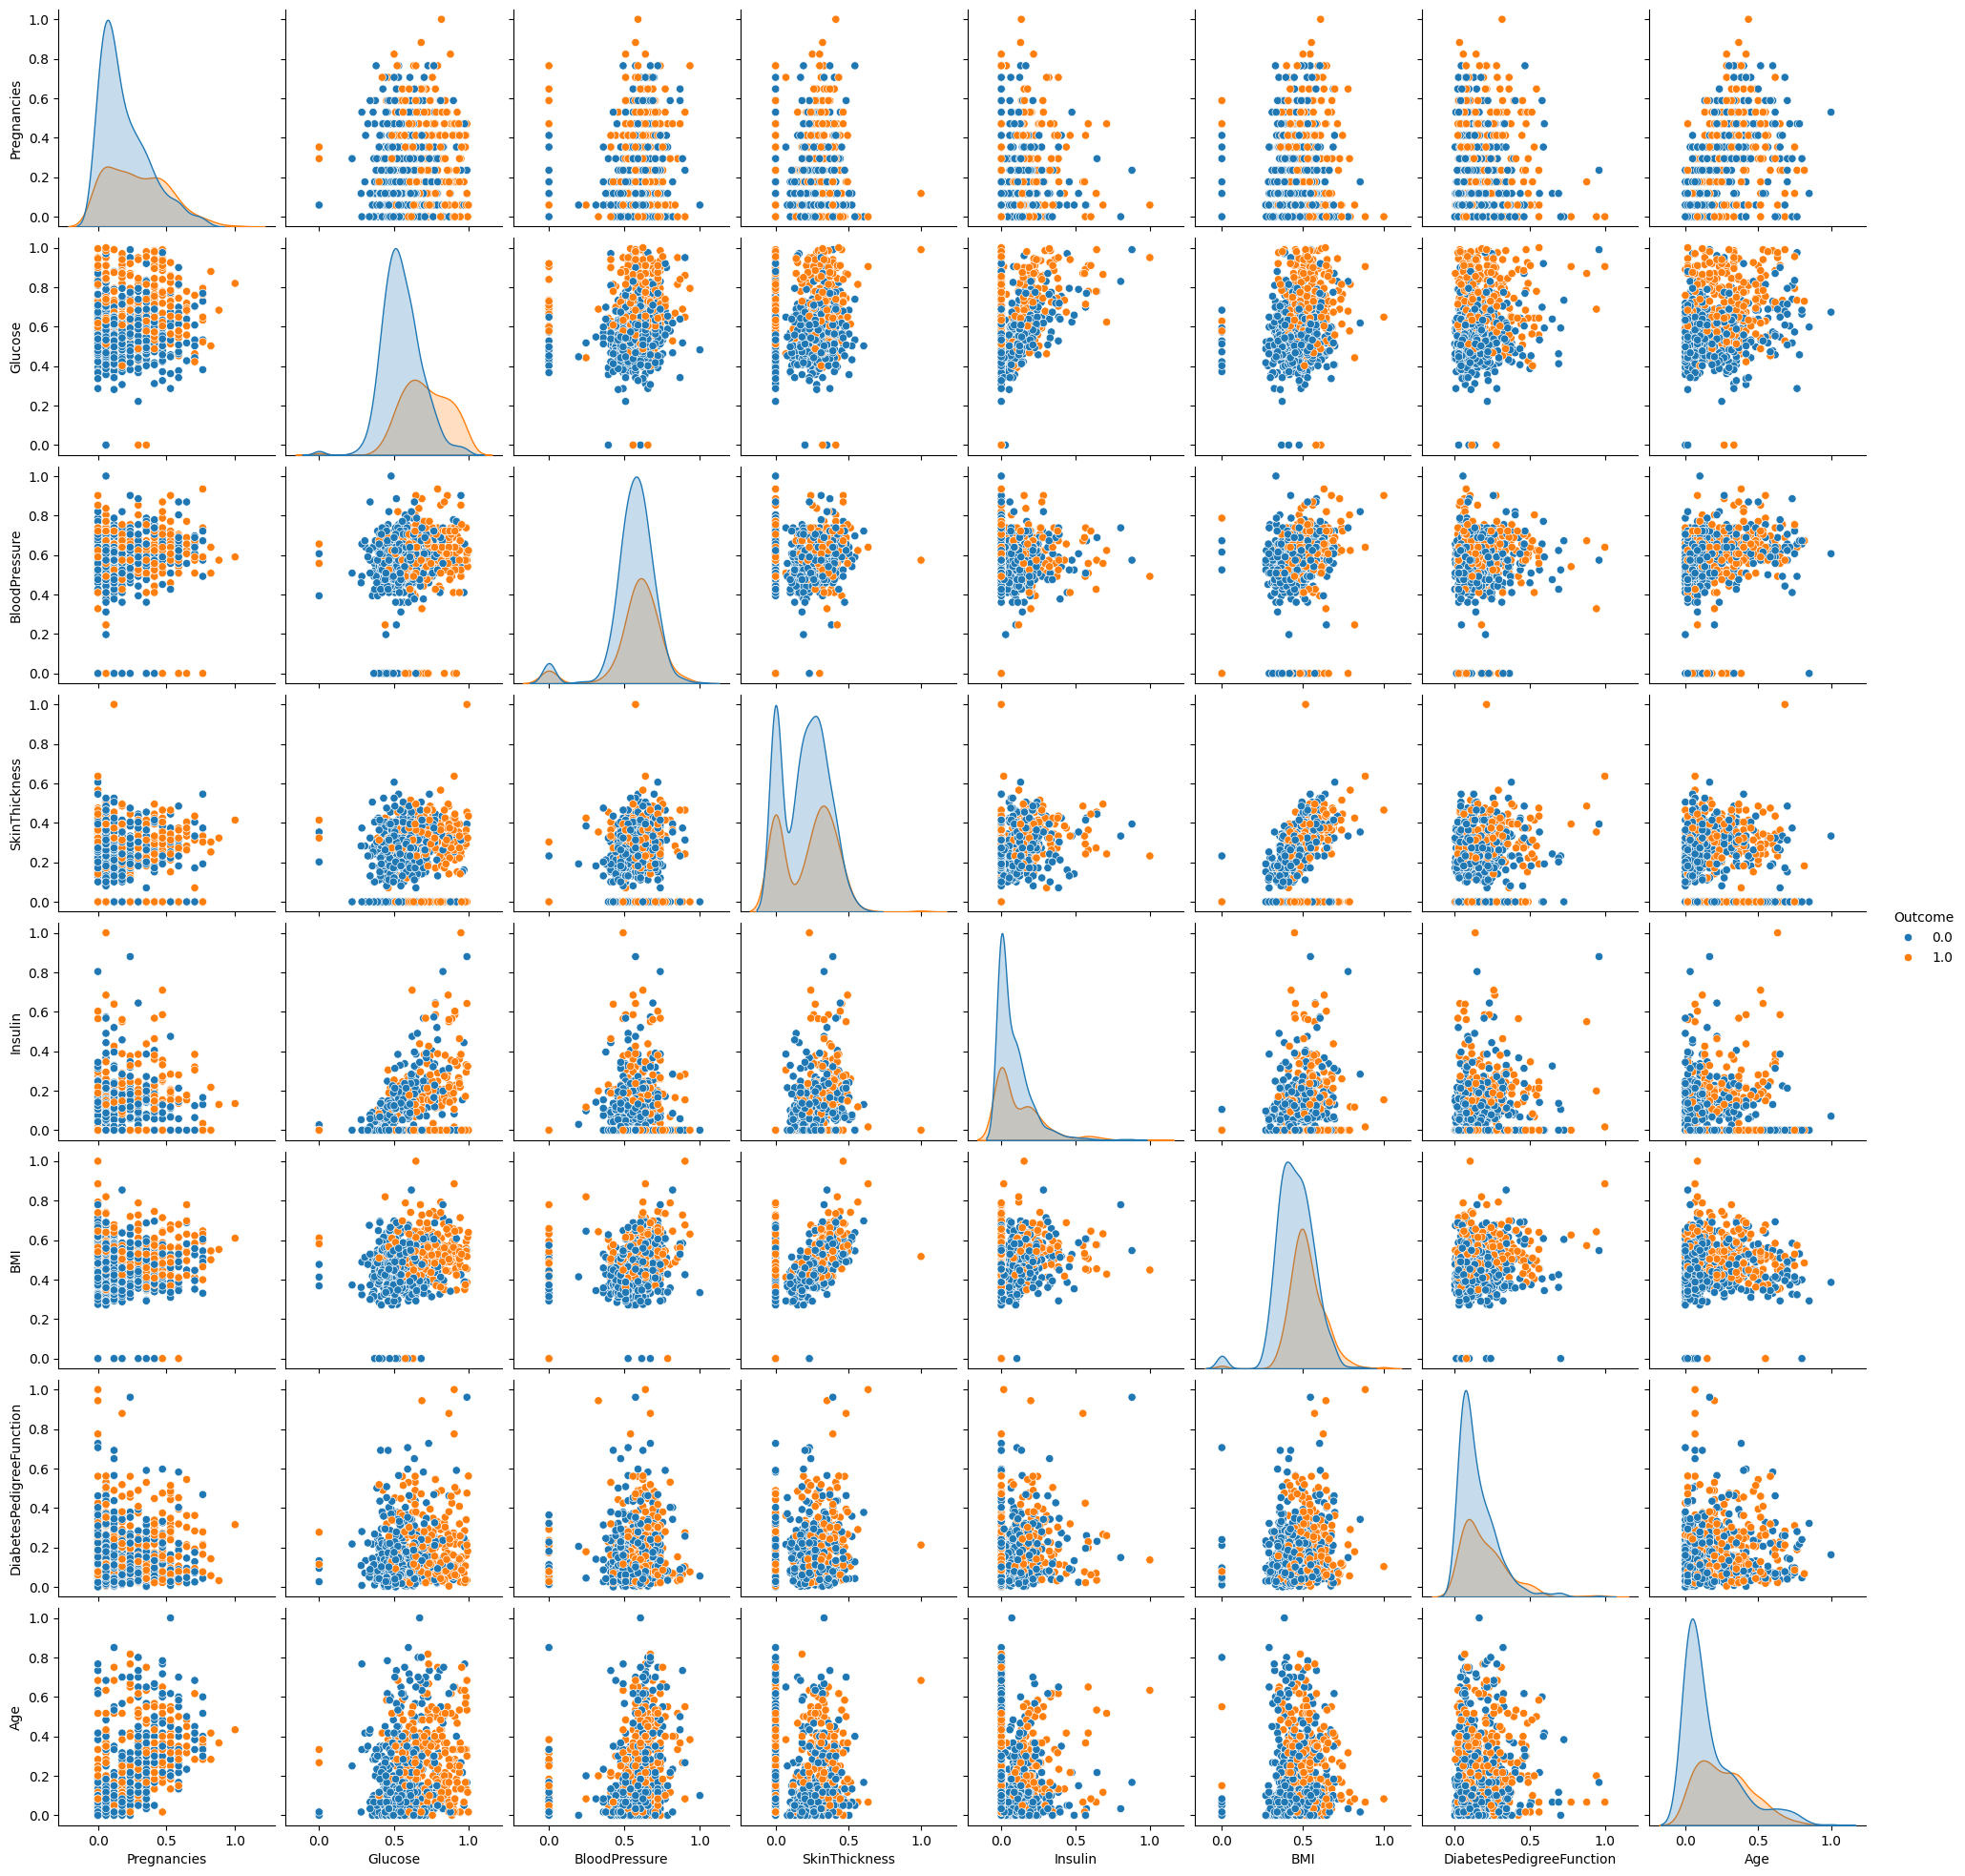

In [13]:
sns.pairplot(data, hue = "Outcome", diag_kind = "kde")

Plotting boxplots:

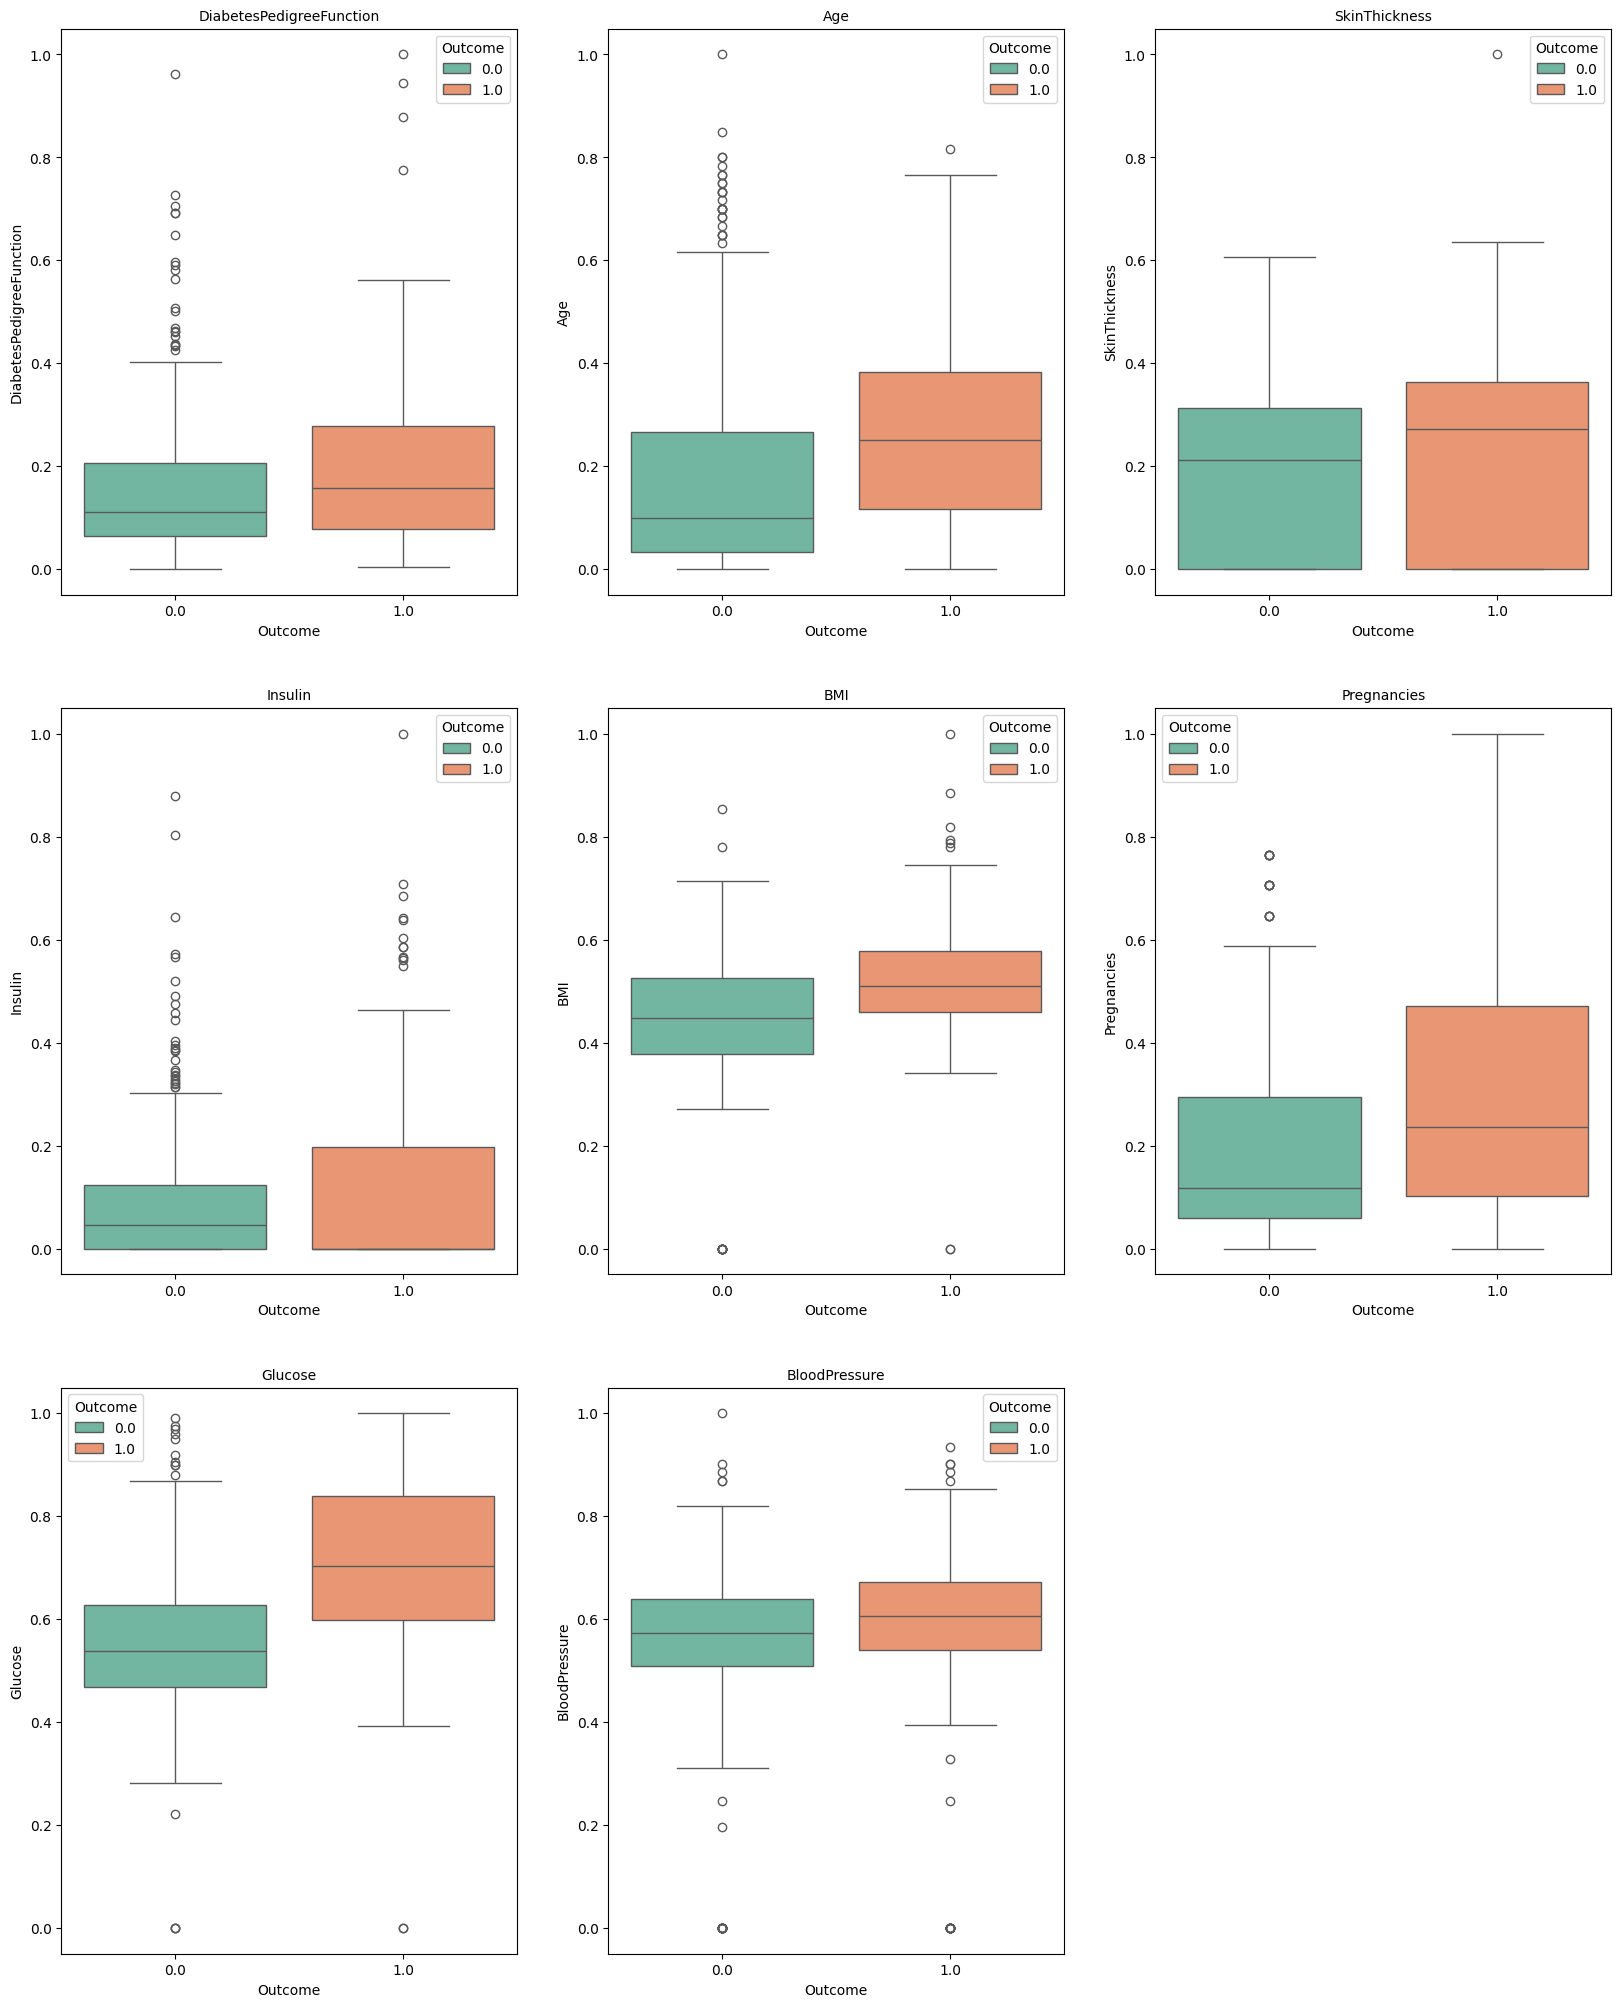

In [14]:
featureTitles = ['DiabetesPedigreeFunction', 'Age', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies', 'Glucose', 'BloodPressure']
plt.figure(figsize=(20,25))

for n, featureTitle in enumerate(featureTitles, 1):
    plt.subplot(3, 3, n)
    sns.boxplot(x = "Outcome", y = featureTitle, data = data, hue = "Outcome", palette = "Set2", dodge = False)
    plt.title(f"{featureTitle}", fontsize = 10)
    plt.ylabel(featureTitle)

Performing principal component analysis:

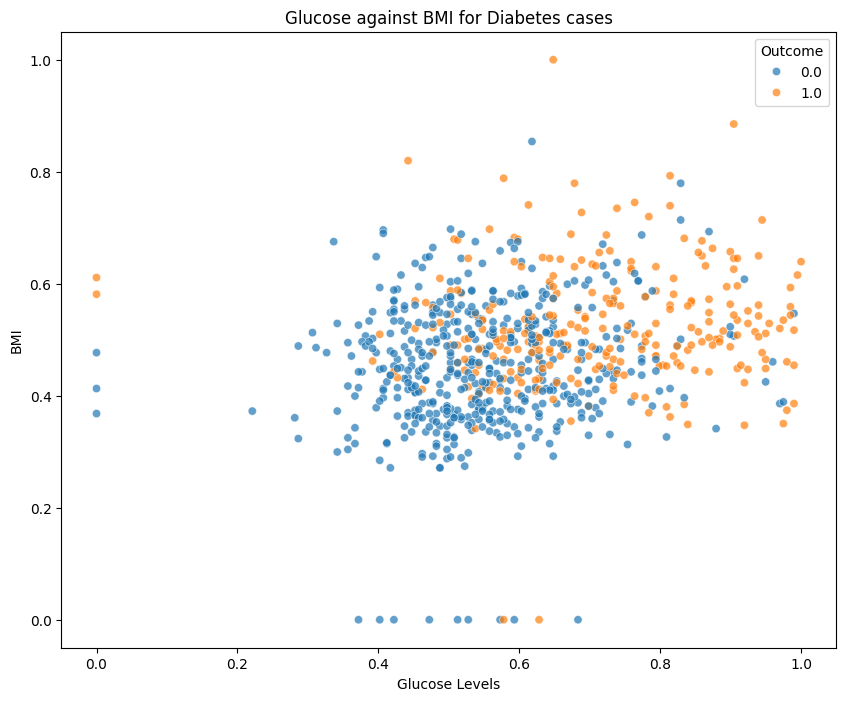

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = "Glucose", y = "BMI", hue = "Outcome", alpha = 0.7)
plt.title("Glucose against BMI for Diabetes cases")
plt.xlabel("Glucose Levels")
plt.ylabel("BMI")
plt.show()

## OUTLIER ANALYSIS 

Z-Score Method:

In [16]:
def ZScoreOutlier(data):
    m = np.mean(data)
    sd = np.std(data)
    for i in data:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("%s Outliers:" %(column), out)

for column in data.columns:
    out = []
    ZScoreOutlier(data[column])

Pregnancies Outliers: [0.8823529411764706, 1.0, 0.8235294117647058, 0.8235294117647058]
Glucose Outliers: [0.0, 0.0, 0.0, 0.0, 0.0]
BloodPressure Outliers: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
SkinThickness Outliers: [1.0]
Insulin Outliers: [0.6418439716312057, 1.0, 0.5851063829787234, 0.5732860520094563, 0.5851063829787234, 0.5650118203309693, 0.8794326241134752, 0.8037825059101655, 0.6442080378250591, 0.549645390070922, 0.6843971631205674, 0.5602836879432624, 0.5673758865248227, 0.7092198581560284, 0.5200945626477541, 0.6382978723404256, 0.5673758865248227, 0.6028368794326241]
BMI Outliers: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.8852459016393444, 0.0, 0.0, 0.8539493293591655, 0.0, 0.0]
DiabetesPedigreeFunction Outliers: [0.9436379163108454, 0.7749786507258752, 0.7271562766865926, 0.9611443210930829, 0.5969257045260461, 0.8791631084543126, 0.70

Robust Z-Score:

In [17]:
def robustZScoreOutlier(data):
    median = np.median(data)
    ma = stats.median_absolute_deviation(data)
    for i in data:
         z = (0.6745*(i-med)) / (np.median(ma))
         if np.abs(z) > 3:
              out.append(i)
    print("%s Outliers:" %(column), out)

for column in data.columns:
    out = []
    ZScoreOutlier(data[column])

Pregnancies Outliers: [0.8823529411764706, 1.0, 0.8235294117647058, 0.8235294117647058]
Glucose Outliers: [0.0, 0.0, 0.0, 0.0, 0.0]
BloodPressure Outliers: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
SkinThickness Outliers: [1.0]
Insulin Outliers: [0.6418439716312057, 1.0, 0.5851063829787234, 0.5732860520094563, 0.5851063829787234, 0.5650118203309693, 0.8794326241134752, 0.8037825059101655, 0.6442080378250591, 0.549645390070922, 0.6843971631205674, 0.5602836879432624, 0.5673758865248227, 0.7092198581560284, 0.5200945626477541, 0.6382978723404256, 0.5673758865248227, 0.6028368794326241]
BMI Outliers: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.8852459016393444, 0.0, 0.0, 0.8539493293591655, 0.0, 0.0]
DiabetesPedigreeFunction Outliers: [0.9436379163108454, 0.7749786507258752, 0.7271562766865926, 0.9611443210930829, 0.5969257045260461, 0.8791631084543126, 0.70

In [18]:
def WinsorizationOutliers(data):
    q1 = np.percentile(data , 1)
    q3 = np.percentile(data , 99)
    for i in data:
        if i > q3 or i < q1:
            out.append(i)
    print("%s Outliers:" %(column), out)

for column in data.columns:
    out = []
    WinsorizationOutliers(data[column])

Pregnancies Outliers: [0.8823529411764706, 1.0, 0.8235294117647058, 0.8235294117647058]
Glucose Outliers: [0.9899497487437185, 0.22110552763819097, 0.0, 0.0, 0.9899497487437185, 0.0, 0.0, 0.9899497487437185, 0.0, 0.9949748743718593, 0.9899497487437185, 1.0, 0.2814070351758794]
BloodPressure Outliers: [0.9016393442622951, 0.8852459016393442, 1.0, 0.9016393442622951, 0.8852459016393442, 0.9016393442622951, 0.9344262295081968]
SkinThickness Outliers: [0.6060606060606061, 0.5454545454545454, 0.5656565656565656, 0.5454545454545454, 0.5252525252525253, 0.6363636363636364, 0.5252525252525253, 1.0]
Insulin Outliers: [0.6418439716312057, 1.0, 0.8794326241134752, 0.8037825059101655, 0.6442080378250591, 0.6843971631205674, 0.7092198581560284, 0.6382978723404256]
BMI Outliers: [0.7928464977645306, 0.819672131147541, 1.0, 0.7794336810730254, 0.7794336810730254, 0.7883755588673622, 0.8852459016393444, 0.8539493293591655]
DiabetesPedigreeFunction Outliers: [0.9436379163108454, 0.7749786507258752, 0.7

In [25]:
from sklearn.cluster import DBSCAN

def DBOutliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print("%s :" %(column), data['cluster'].value_counts().sort_values(ascending=False))


for column in data.columns:
    out = []
    DBOutliers(data[column])

cluster
0    768
Name: count, dtype: int64
